# House Prices Regression

# Introduction

## Question Definition

- Factors That affect the prices of a house & Prediction of house sales

## Context
- The employers at HAAS Consultancy Company would like to have better insights on what affects the prices of a house and would like to have a 'predictor' that would predict the price of a house given its features

## Metric of Success
- Relationships between the characteristics of a house and its price such as numbert of bedrooms and location in longitude/latitude
- A regression model that is the best at predicting a house's price based on its features

## Experimental Design
- Exploratory Data Analysis
- Development of regression models such as Linear Regressor, Quantile Regressor, Lasso Regressor, Ridge Regressor and Elastic Net regressor

# Data Exploration

In [247]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Regression Libraries libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# Other ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#seaborn theme
sns.set_theme(style="darkgrid")

In [139]:
# Load the dataset and preview first 5 records
df = pd.read_csv('/Users/RyanMburu/Documents/DS-Projects/Supervised-Learning/HAAS- Real Estate/Independent Project Week 7 - house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [140]:
# Last 5 records
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [141]:
# Number of records and features
df.shape

(21613, 20)

- We will work with about 21,000 records/rows of data and about 18 features as id is useless and one is the dependent variable

# Data Cleaning

## Data Types

In [142]:
# Check datatypes
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Looks good so far

## Null Values

In [143]:
# Null values
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values

## Duplicate Values

In [144]:
# Duplicates
df.duplicated().sum()

3

In [145]:
df = df.drop_duplicates()

df.duplicated().sum()

0

There were 3 duplicates and have been dropped

## Hot Encoding

- To avoid fitting our model with absurd data that will affect prediction, we will do some encoding

In [146]:
# The Year Reinovated column will be changed to 1 and 0 that represents whether the house has been reinovated or not

# The new encoded column will be saved as a new column

df['renovated'] = df['yr_renovated'].mask(df['yr_renovated'] > 1, 1)


In [147]:
# Will drop the yr reinovated column
df = df.drop(['yr_renovated'], axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,0


In [148]:
# do the same for basement
df['basement'] = df['sqft_basement'].mask(df['sqft_basement'] > 1, 1)
df = df.drop(['sqft_basement'], axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


# Outliers

### 1. Price of houses

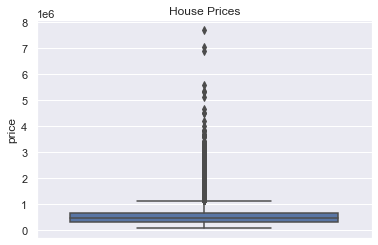

In [149]:
# Will use boxplots to show the outliers in the data

# Outliers for prices of a house

sns.boxplot(data=df, y = 'price')
plt.title('House Prices')
plt.show()

In [150]:
# Handling the outliers

# Will use the IQR method

q25 = df['price'].quantile(0.25)
q75 = df['price'].quantile(0.75)

In [151]:
# IQR and limits
IQR = q75 - q25
IQR

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR


In [152]:
# Identify and handle Outliers

df[df['price'] > upper_limit]

df = df[df['price'] < upper_limit]

df


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509,0,0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200,0,0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,2009,98144,47.5944,-122.299,1020,2007,0,0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,2004,98027,47.5345,-122.069,1410,1287,0,0


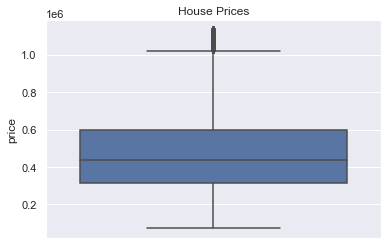

In [153]:
# Output new price boxplot to confirm
sns.boxplot(data=df, y = 'price')
plt.title('House Prices')
plt.show()

### 2. SQFT lot

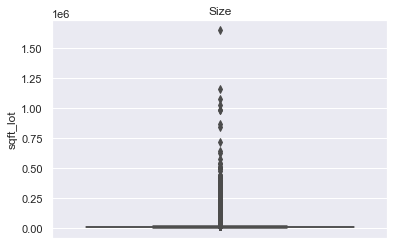

In [154]:
sns.boxplot(data=df, y = 'sqft_lot')
plt.title('Size')
plt.show()

Those are some nasty outliers that might affect our model

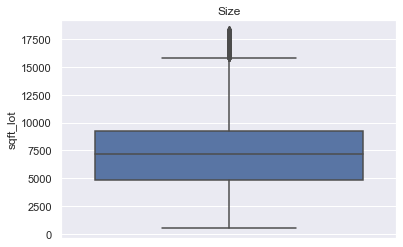

In [155]:
# Will use the IQR method

q25 = df['sqft_lot'].quantile(0.25)
q75 = df['sqft_lot'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

df = df[df['sqft_lot'] < upper_limit]

sns.boxplot(data=df, y = 'sqft_lot')
plt.title('Size')
plt.show()

### SQFT Living

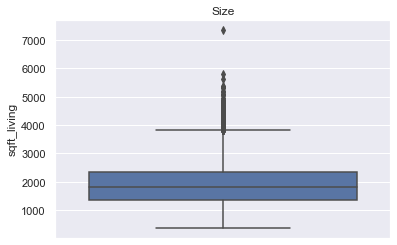

In [156]:
#Checking for outliers
sns.boxplot(data=df, y = 'sqft_living')
plt.title('Size')
plt.show()

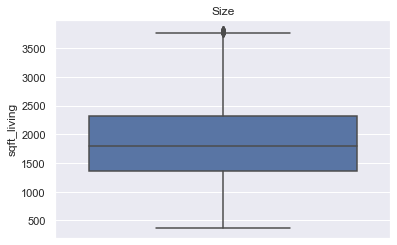

In [157]:
# handle the outliers
q25 = df['sqft_living'].quantile(0.25)
q75 = df['sqft_living'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

df = df[df['sqft_living'] < upper_limit]

sns.boxplot(data=df, y = 'sqft_living')
plt.title('Size')
plt.show()

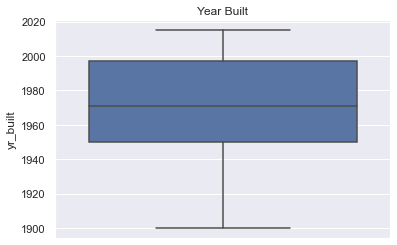

In [158]:
# Lets see if the years have any outlier
sns.boxplot(data=df, y = 'yr_built')
plt.title('Year Built')
plt.show()

As there are no more outliers, we are done with cleaning and will explore our dataset

In [159]:
# Lets see how many records we are left with
df.shape

(17979, 20)

# EDA

## Univariate Analysis

In [160]:
# Average price of houses

df['price'].mean()

461862.5639357028

In [161]:
# Summary of Prices
df['price'].describe()

count    1.797900e+04
mean     4.618626e+05
std      2.003425e+05
min      7.800000e+04
25%      3.070000e+05
50%      4.250000e+05
75%      5.800000e+05
max      1.130000e+06
Name: price, dtype: float64

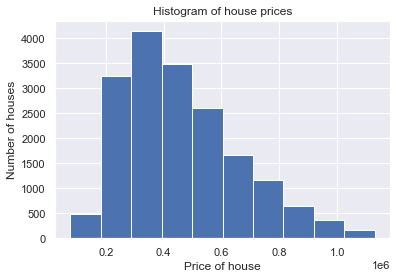

In [162]:
# Distribution
df['price'].hist()
plt.title('Histogram of house prices')
plt.xlabel('Price of house')
plt.ylabel('Number of houses')
plt.show()

/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

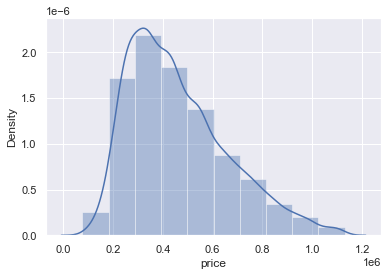

In [163]:
# Better visual
sns.distplot(a=df['price'], bins=10)

The distribution is slightly skewed to the left

/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


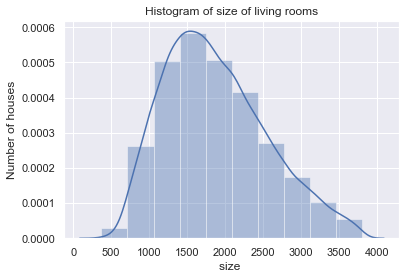

In [164]:
# Other histograms
sns.distplot(a=df['sqft_living'], bins=10)
plt.title('Histogram of size of living rooms')
plt.xlabel('size ')
plt.ylabel('Number of houses')
plt.show()

Normally distributed

/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


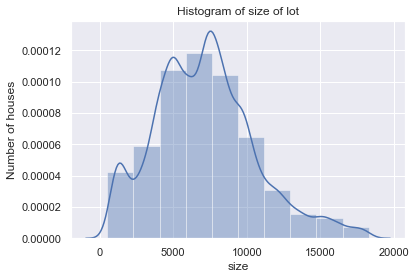

In [165]:
# Histogram for size of parking lot
sns.distplot(a=df['sqft_lot'], bins=10)
plt.title('Histogram of size of lot')
plt.xlabel('size')
plt.ylabel('Number of houses')
plt.show()

Not a normal distribution

### Bar graphs

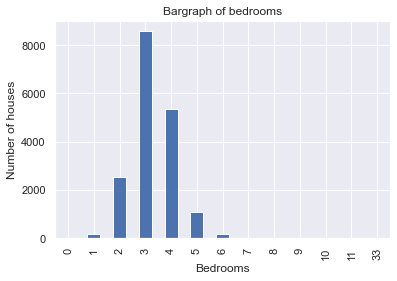

In [175]:
# Most popular number of bedrooms
df.groupby('bedrooms')['bedrooms'].count().plot(kind='bar')
plt.title('Bargraph of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Number of houses')
plt.show()

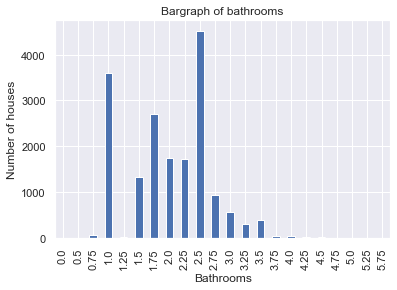

In [176]:
# Bar graph vizualizing houses with a certain number of bathrooms
df.groupby('bathrooms')['bathrooms'].count().plot(kind='bar')
plt.title('Bargraph of bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Number of houses')
plt.show()

the most common is 2.5 bathroomed houses

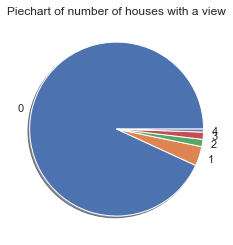

In [177]:
# Pie chart for houses with a view
plt.pie(df['view'].value_counts(), labels=[0, 1, 2, 3, 4], shadow=True)
plt.title('Piechart of number of houses with a view')
plt.show()

Most houses do not have a view

## Bivariate Analysis

### scatter Plots

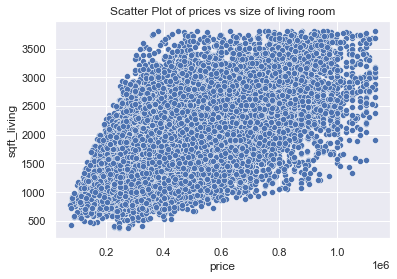

In [179]:
# Scatter Plot representing price of a house against size of the house :

# 1. Size of living room

sns.scatterplot(x='price', y='sqft_living', data=df)
plt.title('Scatter Plot of prices vs size of living room')
plt.show()

Slightly noticable that as size of the living room increases, so does the price of house

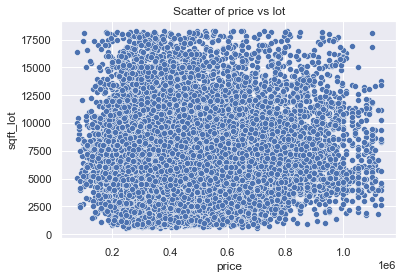

In [180]:
# Zize of parking lot
sns.scatterplot(x='price', y='sqft_lot', data=df)
plt.title('Scatter of price vs lot')
plt.show()

No relationship btwn price and lot

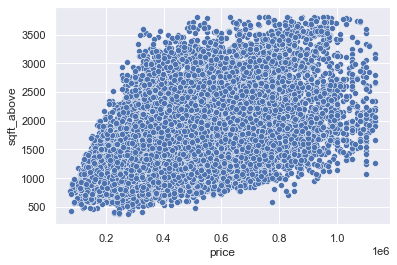

In [181]:
# Zize of above
sns.scatterplot(x='price', y='sqft_above', data=df)

plt.show()

Slight relationship observed

### Linegraph

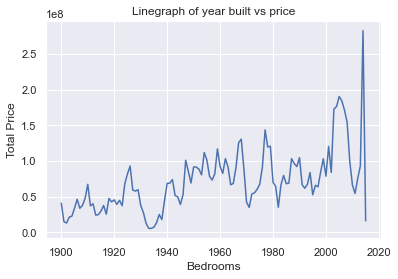

In [182]:
# To obvserve relationship between prices of houses and when they were built

df.groupby('yr_built')['price'].sum().plot()
plt.title('Linegraph of year built vs price')
plt.xlabel('Bedrooms')
plt.ylabel('Total Price')
plt.show()

The prices have been steadily increasing except for 2020 where things got hectic

### Boxplots

<AxesSubplot:xlabel='renovated', ylabel='price'>

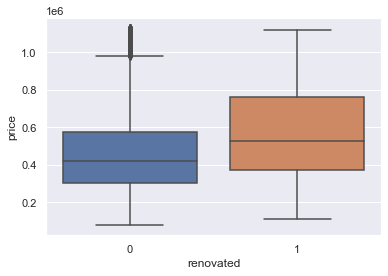

In [185]:
# Boxplots of renovated houses and houses with a basement

sns.boxplot(x='renovated', y='price', data=df)

Reinovated houses are slightly more expensive

<AxesSubplot:xlabel='basement', ylabel='price'>

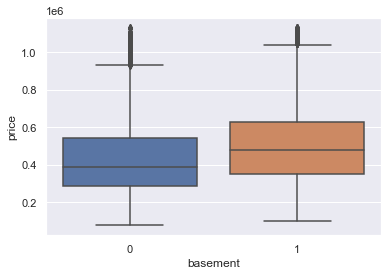

In [186]:
sns.boxplot(x='basement', y='price', data=df)

Houses with a basement are as well slighty more expensive

## Multi-Collinearity

In [188]:
df = df.drop(['id'], axis=1)

In [193]:
# Will split the data into independent and dependent variables

X_corr = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'zipcode', 'renovated','basement']]

y_corr = df['price']

X_corr.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,renovated,basement
bedrooms,1.000000,0.472803,0.597993,0.189580,0.135349,-0.016753,0.033713,0.030836,0.300699,0.464563,0.149703,-0.151766,0.008878,0.144086
bathrooms,0.472803,1.000000,0.695640,-0.033703,0.506633,-0.007200,0.080433,-0.136444,0.588191,0.610248,0.545696,-0.208819,0.031790,0.136320
sqft_living,0.597993,0.695640,1.000000,0.208318,0.327006,-0.003615,0.155941,-0.060597,0.667412,0.829410,0.336496,-0.195927,0.027060,0.190251
sqft_lot,0.189580,-0.033703,0.208318,1.000000,-0.363891,0.043189,0.063065,0.127201,0.045017,0.158687,-0.049315,-0.252948,-0.010732,-0.020781
floors,0.135349,0.506633,0.327006,-0.363891,1.000000,0.001173,-0.015732,-0.283363,0.461552,0.535403,0.516536,-0.065422,0.001788,-0.284636
waterfront,-0.016753,-0.007200,-0.003615,0.043189,0.001173,1.000000,0.267113,0.003710,-0.011312,-0.010031,-0.027263,0.042701,0.041609,0.007489
view,0.033713,0.080433,0.155941,0.063065,-0.015732,0.267113,1.000000,0.032691,0.129071,0.047606,-0.075157,0.120070,0.063779,0.146640
condition,0.030836,-0.136444,-0.060597,0.127201,-0.283363,0.003710,0.032691,1.000000,-0.170258,-0.181204,-0.359838,-0.003733,-0.060156,0.133365
grade,0.300699,0.588191,0.667412,0.045017,0.461552,-0.011312,0.129071,-0.170258,1.000000,0.670717,0.485571,-0.179827,-0.010516,0.010697
sqft_above,0.464563,0.610248,0.829410,0.158687,0.535403,-0.010031,0.047606,-0.181204,0.670717,1.000000,0.461724,-0.278385,-0.001544,-0.306256


<AxesSubplot:>

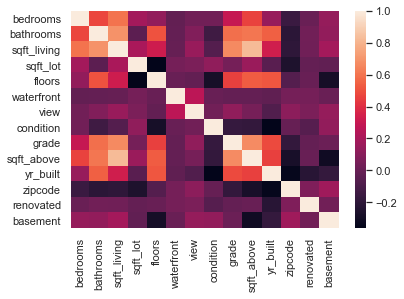

In [194]:
sns.heatmap(X_corr.corr())

In [198]:
# VIF

# Will get the VIF score for each factor

vif = pd.DataFrame()

vif['feature'] = X_corr.columns
vif['VIF Score'] = [variance_inflation_factor(X_corr.values, i) for i in range(len(X_corr.columns))]
vif

,feature,VIF Score
0,bedrooms,23.987925
1,bathrooms,28.574561
2,sqft_living,115.379336
3,sqft_lot,8.014708
4,floors,21.037922
5,waterfront,1.087340
6,view,1.241454
7,condition,35.038550
8,grade,144.890442
9,sqft_above,102.619432


Features such as size of liviong room, grade, year built and location/zipcode have high VIF scores, indicating high collinearity between the variables as opposed to view and waterfront

# Regression

## Train and test splitting

In [200]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'renovated','basement']].values

y = df['price'].values

In [201]:
print(X.shape)
print(y.shape)

(17979, 14)
(17979,)


we will have 14 features and 17,979 rows

In [205]:
# standard scaling

# Will need to scale our values so as to 'unify' them and avoid bias
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[-0.32754476, -1.47047489, -1.03039888, ...,  1.78476446,
        -0.1925888 , -0.78713647],
       [-0.32754476,  0.35404569,  1.02344595, ...,  0.80281708,
         5.19240982,  1.27042773],
       [-1.4346941 , -1.47047489, -1.63620923, ..., -0.9943319 ,
        -0.1925888 , -0.78713647],
       ...,
       [-1.4346941 , -1.835379  , -1.26681268, ...,  1.15483596,
        -0.1925888 , -0.78713647],
       [-0.32754476,  0.7189498 , -0.40981267, ..., -1.0128592 ,
        -0.1925888 , -0.78713647],
       [-1.4346941 , -1.835379  , -1.26681268, ...,  1.15483596,
        -0.1925888 , -0.78713647]])

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_test.shape)

(14383, 14)
(3596,)


# Linear Regression

In [207]:
# Will perform linear regression, which will act as our baseline model

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

In [208]:
# Will display the values against the OG values

df_linear = pd.DataFrame({'Original Values' : y_test, 'Predicted Values' : y_pred})
df_linear

,Original Values,Predicted Values
0,565000.0,425339.552889
1,335000.0,334264.084730
2,679950.0,468669.907403
3,557000.0,541844.493517
4,353000.0,445172.704456
...,...,...
3591,490000.0,480740.918997
3592,343500.0,516996.829699
3593,674950.0,557658.354420
3594,365000.0,407883.416001


In [209]:
# Check the coefficients of the values used in the linear regressor

coef_dict = {}

for coef, features in zip(linear_reg.coef_, X_corr.columns):
  coef_dict[features] = coef

coef_dict

{'bedrooms': -11681.677471418932,
 'bathrooms': 12233.061503262536,
 'sqft_living': 57471.98986951158,
 'sqft_lot': -23851.88475431648,
 'floors': 13476.00302361439,
 'waterfront': 5056.667426123664,
 'view': 18744.83685889258,
 'condition': 13566.005482927807,
 'grade': 97627.06805035104,
 'sqft_above': 15577.957086293853,
 'yr_built': -78301.52575772053,
 'zipcode': -1421.0529163733615,
 'renovated': 225.83039846950768,
 'basement': 15615.78169514745}

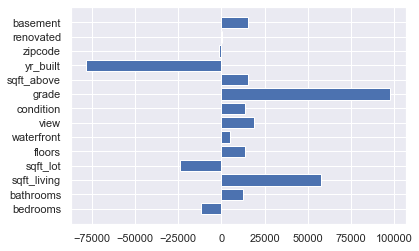

In [211]:
# Plot the coefficients
plt.barh(y=X_corr.columns, width=linear_reg.coef_)
plt.show()

- As seen, grade, size of living room and year built have the most influence in prediction in our linear regressor

In [212]:
# R2 score and RMSE Score

print('The R2 score for  Linear Regressor is : ', linear_reg.score(X_test, y_test))
print('The RMSE for Linear Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The R2 score for  Linear Regressor is :  0.5551494453275416
The RMSE for Linear Regressor is :  133674.83185355054


The RMSE score is 133K, which means the predictions are averagely about 100,00k values off

Our r2 score is 0.55

# Ridge Regression

- Here, the regressor will adjust the coefficients automatically for more accurate predictions

In [214]:
# Define the hyperparameter (alpha) for the model

ridge_gs = Ridge(normalize=True)

grid_ridge = GridSearchCV(estimator = ridge_gs, param_grid = {'alpha' : np.arange(0.01, 1, 20)}, n_jobs=1, cv=10, refit=True)

grid_ridge.fit(X_train, y_train)
grid_ridge.best_params_

{'alpha': 0.01}

In [226]:
# Will do ridge regression
ridge_reg = Ridge(alpha=0.01, normalize=True)

ridge_reg.fit(X_train, y_train)

y_pred_r = ridge_reg.predict(X_test)

df_ridge = pd.DataFrame({'Original Values' : y_test, 'Predicted Values' : y_pred_r})
df_ridge

,Original Values,Predicted Values
0,565000.0,426958.342882
1,335000.0,336605.937835
2,679950.0,470119.724946
3,557000.0,542908.589792
4,353000.0,446666.496832
...,...,...
3591,490000.0,481169.737552
3592,343500.0,519242.406469
3593,674950.0,559396.718387
3594,365000.0,409591.470170


In [227]:
# Coefficients

coef_dict_r = {}

for coef, features in zip(ridge_reg.coef_, X_corr.columns):
  coef_dict_r[features] = coef

coef_dict_r

{'bedrooms': -11114.429953817917,
 'bathrooms': 12128.72065012076,
 'sqft_living': 54189.68481661592,
 'sqft_lot': -23458.813772346093,
 'floors': 13061.60331408928,
 'waterfront': 4947.288838571928,
 'view': 18962.898171856796,
 'condition': 13899.359289385726,
 'grade': 95656.67009394898,
 'sqft_above': 19091.635333730526,
 'yr_built': -76213.59748746033,
 'zipcode': -892.7910270426629,
 'renovated': 670.7831502670848,
 'basement': 17165.865453356768}

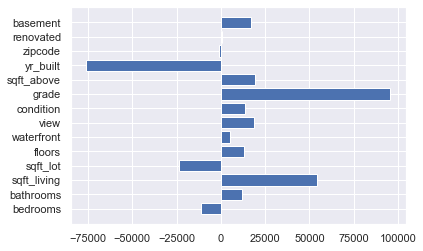

In [228]:
plt.barh(y=X_corr.columns, width=ridge_reg.coef_)
plt.show()

Coefficients look similar to the linear reg so far

In [229]:
# R2 score and RMSE Score

print('The R2 score for  Linear Regressor is : ', ridge_reg.score(X_test, y_test))
print('The RMSE for Linear Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

The R2 score for  Linear Regressor is :  0.5552278656448888
The RMSE for Linear Regressor is :  133663.04892481636


The RMSE score is less in the Ridge regression by a very small amrgin, but shows a better improvement in the model

# Lasso Regression

Here, we are looking foward to the regressor reducing the features so as to offer better predictions, aight tuende

In [230]:
# Parameters to use in the model
lasso_gs = Lasso(normalize=True)

grid_lasso = GridSearchCV(estimator = lasso_gs, param_grid = {'alpha' : np.arange(0.01, 1, 20)}, n_jobs=1, cv=10, refit=True)

grid_lasso.fit(X_train, y_train)
grid_lasso.best_params_

{'alpha': 0.01}

In [238]:
# Will build model, fit and predict
lasso_reg = Lasso(alpha=0.01, normalize=True)

lasso_reg.fit(X_train, y_train)

y_pred_l = lasso_reg.predict(X_test)

df_lasso = pd.DataFrame({'Original Values' : y_test, 'Predicted Values' : y_pred_l})
df_lasso

,Original Values,Predicted Values
0,565000.0,425338.491940
1,335000.0,334267.221881
2,679950.0,468673.117887
3,557000.0,541845.354109
4,353000.0,445179.963299
...,...,...
3591,490000.0,480740.557640
3592,343500.0,516998.111632
3593,674950.0,557649.809853
3594,365000.0,407880.043026


In [236]:
# Coefficients

coef_dict_l = {}

for coef, features in zip(lasso_reg.coef_, X_corr.columns):
  coef_dict_l[features] = coef

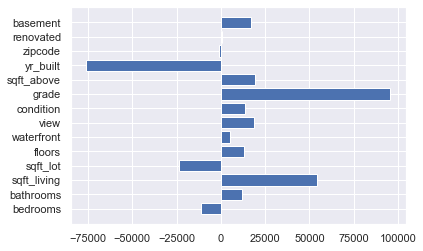

In [237]:
# Viz of the coefficients
plt.barh(y=X_corr.columns, width=ridge_reg.coef_)
plt.show()

As seen, lasso reduced the reinovated column to zero

In [239]:
# R2 score and RMSE Score

print('The R2 score for  Lasso Regressor is : ', lasso_reg.score(X_test, y_test))
print('The RMSE for Lasso Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

The R2 score for  Lasso Regressor is :  0.5551494009814917
The RMSE for Lasso Regressor is :  133674.83851640683


Somehow, the RMSE of the lasso regressor is exactly same with the linear regressor

# Elastic Net Regressor

Here, it is a combination of Ridge and Lasso regression, kinda the best of both worlds

In [240]:
# Hyprerparameters

# Hyperparameters will be two instead of one i.e alpha and l1

elastic = ElasticNet(normalize=True)

grid_net =  GridSearchCV(estimator=elastic, param_grid={'alpha' : np.arange(0.01, 2, 10), 'l1_ratio' : [.2, .4, .6, .8] }, cv=10, n_jobs=1, refit=True)

In [241]:
grid_net.fit(X_train, y_train)

grid_net.best_params_

{'alpha': 0.01, 'l1_ratio': 0.8}

In [242]:
# Will fit the data onto the model and perform predictions

elastic_reg = ElasticNet(alpha=0.01, l1_ratio=0.8, normalize=True)

elastic_reg.fit(X_train, y_train)

y_pred_ela = elastic_reg.predict(X_test)

In [243]:
df_ela = pd.DataFrame({'Original Values' : y_test, 'predictions' : y_pred_ela})
df_ela

,Original Values,predictions
0,565000.0,461394.354853
1,335000.0,463317.587148
2,679950.0,469602.382502
3,557000.0,473219.914108
4,353000.0,466111.425189
...,...,...
3591,490000.0,461923.316250
3592,343500.0,464220.848189
3593,674950.0,479457.309943
3594,365000.0,458061.087582


As observed, the elastic net predicted the values along 400,000 range, dont see this working but lets test

In [244]:
# Coefficients

coef_dict_ela = {}

for coef, features in zip(elastic_reg.coef_, X_corr.columns):
  coef_dict_ela[features] = coef

coef_dict_ela

{'bedrooms': 1577.3447918548582,
 'bathrooms': 2428.4517325541256,
 'sqft_living': 3605.9821681449184,
 'sqft_lot': -234.42444526039537,
 'floors': 1503.2752580414883,
 'waterfront': 343.3091271865131,
 'view': 1625.6261488682835,
 'condition': 517.8795030202599,
 'grade': 3711.961018695191,
 'sqft_above': 2827.066111145451,
 'yr_built': -218.90467928719852,
 'zipcode': 156.67155418199195,
 'renovated': 671.9790319651659,
 'basement': 1242.550401898658}

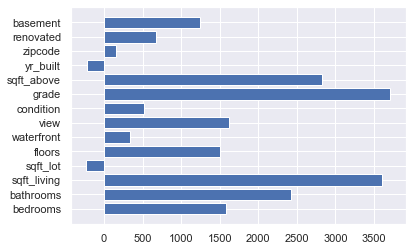

In [245]:
# Viz of the coefficients
plt.barh(y=X_corr.columns, width=elastic_reg.coef_)
plt.show()

For some reason, the elastic net model converted the features to have positive coefficients

In [246]:
# R2 score and RMSE Score

print('The R2 score for  Elastic Net Regressor is : ', elastic_reg.score(X_test, y_test))
print('The RMSE for Elastic Net Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ela)))

The R2 score for  Elastic Net Regressor is :  0.07659681769358928
The RMSE for Elastic Net Regressor is :  192592.0082272628


Yep, the RMSE has increased by a mile, therefore is not appropriate at all

# Quantile Regression

In [254]:
# Fill finalize with Quantile regression

# Fit the model
mod = smf.quantreg('y ~ X', df)
res = mod.fit(q=0.75)

/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [255]:
# Print out model
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4024
Model:                       QuantReg   Bandwidth:                   2.020e+04
Method:                 Least Squares   Sparsity:                    3.792e+05
Date:                Fri, 15 Oct 2021   No. Observations:                17979
Time:                        23:06:57   Df Residuals:                    17964
                                        Df Model:                           14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.425e+05   1224.727    442.933      0.000     5.4e+05    5.45e+05
X[0]       -1.452e+04   1771.190     -8.195      0.000    -1.8e+04    -1.1e+04
X[1]        1.114e+04   2134.351      5.218      0.000    6953.421    1.53e+04
X[2]         6.99e+04   4586.900     15.240      0.0

In [ ]:
# All the coefficients of the factors are outlined in the model

# Conclusion

From the developed models, it was observed that the Ridge Regressor gave the best predictions out of all 5 models as it has the smallest Root Mean Squared Error value.